In [1]:
import json
import random
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import time
from GeneticAlgorithm import GeneticAlgorithm
np.random.seed(7)
random.seed(7)

In [2]:
# Carregar a matriz de adjacência
with open('matriz_de_adjacência.json', 'r') as file:
    matriz = json.load(file)

display(matriz)

[[0, 20, 0, 0, 0, 0, 0, 29, 0, 0, 0, 29, 37, 0, 0, 0, 0, 0],
 [20, 0, 25, 0, 0, 0, 0, 28, 0, 0, 0, 39, 0, 0, 0, 0, 0, 0],
 [0, 25, 0, 25, 0, 0, 0, 30, 0, 0, 0, 0, 54, 0, 0, 0, 0, 0],
 [0, 0, 25, 0, 39, 32, 42, 0, 23, 33, 0, 0, 0, 56, 0, 0, 0, 0],
 [0, 0, 0, 39, 0, 12, 26, 0, 0, 19, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 32, 12, 0, 17, 0, 0, 35, 30, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 42, 26, 17, 0, 0, 0, 0, 38, 0, 0, 0, 0, 0, 0, 0],
 [29, 28, 30, 0, 0, 0, 0, 0, 0, 0, 0, 25, 22, 0, 0, 0, 0, 0],
 [0, 0, 0, 23, 0, 0, 0, 0, 0, 26, 0, 0, 34, 0, 0, 43, 0, 0],
 [0, 0, 0, 33, 19, 35, 0, 0, 26, 0, 24, 0, 0, 30, 19, 0, 0, 0],
 [0, 0, 0, 0, 0, 30, 38, 0, 0, 24, 0, 0, 0, 0, 26, 0, 0, 36],
 [29, 39, 0, 0, 0, 0, 0, 25, 0, 0, 0, 0, 27, 0, 0, 43, 0, 0],
 [37, 0, 54, 0, 0, 0, 0, 22, 34, 0, 0, 27, 0, 24, 0, 19, 0, 0],
 [0, 0, 0, 56, 0, 0, 0, 0, 0, 30, 0, 0, 24, 0, 20, 19, 17, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 19, 26, 0, 0, 20, 0, 0, 18, 21],
 [0, 0, 0, 0, 0, 0, 0, 0, 43, 0, 0, 43, 19, 19, 0, 0, 26, 0],
 [0, 0,

In [3]:
# Número de cidades
n_cidades = len(matriz)
print(n_cidades)

18


In [4]:
# Algoritmo de Floyd-Warshall
def floyd_warshall(matriz):
    n = len(matriz)
    dist = [[float('inf')] * n for _ in range(n)]
    for i in range(n):
        dist[i][i] = 0
        for j in range(n):
            if matriz[i][j] != 0:
                dist[i][j] = matriz[i][j]
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if dist[i][k] != float('inf') and dist[k][j] != float('inf'):
                    dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])
    return dist

# Aplicar Floyd-Warshall à matriz
matriz_completa = floyd_warshall(matriz)
display(matriz_completa)

[[0, 20, 45, 70, 109, 102, 112, 29, 71, 91, 107, 29, 37, 61, 81, 56, 78, 93],
 [20, 0, 25, 50, 89, 82, 92, 28, 73, 83, 107, 39, 50, 74, 94, 69, 91, 106],
 [45, 25, 0, 25, 64, 57, 67, 30, 48, 58, 82, 55, 52, 76, 77, 71, 93, 98],
 [70, 50, 25, 0, 39, 32, 42, 55, 23, 33, 57, 80, 57, 56, 52, 66, 70, 73],
 [109, 89, 64, 39, 0, 12, 26, 94, 45, 19, 42, 100, 73, 49, 38, 68, 56, 59],
 [102, 82, 57, 32, 12, 0, 17, 87, 55, 31, 30, 112, 85, 61, 50, 80, 68, 66],
 [112, 92, 67, 42, 26, 17, 0, 97, 65, 45, 38, 122, 99, 75, 64, 94, 82, 74],
 [29, 28, 30, 55, 94, 87, 97, 0, 56, 76, 92, 25, 22, 46, 66, 41, 63, 78],
 [71, 73, 48, 23, 45, 55, 65, 56, 0, 26, 50, 61, 34, 56, 45, 43, 63, 66],
 [91, 83, 58, 33, 19, 31, 45, 76, 26, 0, 24, 81, 54, 30, 19, 49, 37, 40],
 [107, 107, 82, 57, 42, 30, 38, 92, 50, 24, 0, 97, 70, 46, 26, 65, 44, 36],
 [29, 39, 55, 80, 100, 112, 122, 25, 61, 81, 97, 0, 27, 51, 71, 43, 68, 83],
 [37, 50, 52, 57, 73, 85, 99, 22, 34, 54, 70, 27, 0, 24, 44, 19, 41, 56],
 [61, 74, 76, 56, 49,

**Algoritmo Genético**

Run: 0
Run: 1
Run: 2
Run: 3
Run: 4
Run: 5
Run: 6
Run: 7
Run: 8
Run: 9
Run: 10
Run: 11
Run: 12
Run: 13
Run: 14
Run: 15
Run: 16
Run: 17
Run: 18
Run: 19
Run: 20
Run: 21
Run: 22
Run: 23
Run: 24
Run: 25
Run: 26
Run: 27
Run: 28
Run: 29
Run: 30
Run: 31
Run: 32
Run: 33
Run: 34
Run: 35
Run: 36
Run: 37
Run: 38
Run: 39
Run: 40
Run: 41
Run: 42
Run: 43
Run: 44
Run: 45
Run: 46
Run: 47
Run: 48
Run: 49
Comparativo entre Mutação por Swap e Inversão (média de 50 rodadas):
Swap - Distância Média: 425.60 \pm 28.30, 
Tempo Médio: 3.92 \pm 0.01 segundos, 
Gerações Médias: 95.12 \pm 127.77
Inversão - Distância Média: 403.12 \pm 10.93, 
Tempo Médio: 3.93 \pm 0.02 segundos, 
Gerações Médias: 107.08 \pm 122.89
Vitórias - Swap: 8, Inversão: 34, Empate: 8
Índice do representante Swap: 12, Distância: 422.00
Índice do representante Inversão: 0, Distância: 398.00


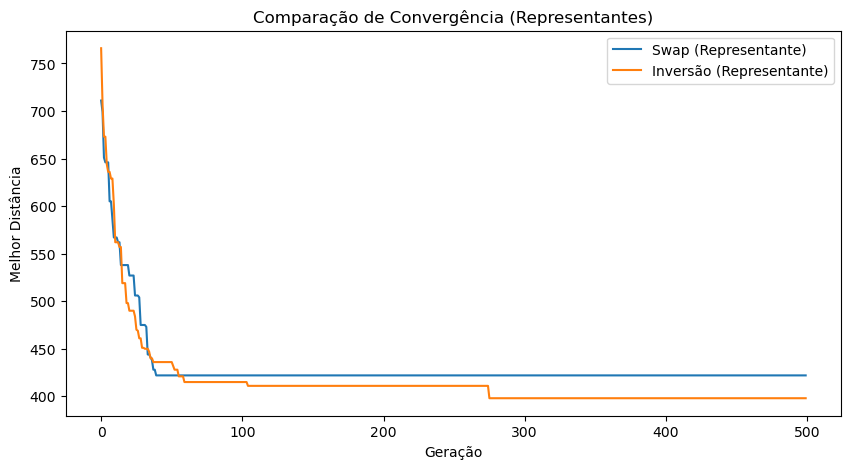

Rota Swap: [ 1  2  8 12 13 16 14 17 18 15 11  7  6  5 10  9  4  3]


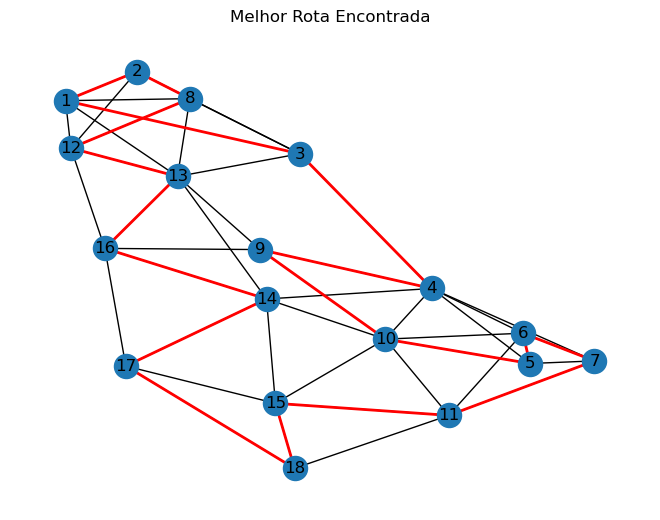

Rota Inversao: [ 1 12  8 13 16 14 17 18 15 11  7  6  5 10  9  4  3  2]


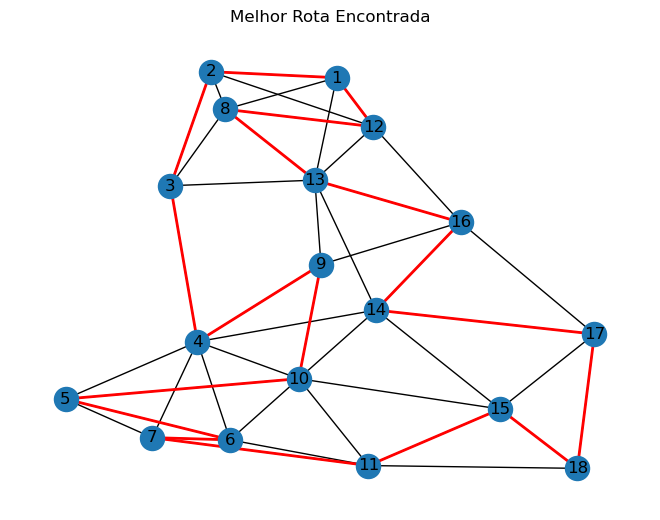

In [5]:
# Comparativo entre mutações
def compare_mutations(matriz_completa, matriz_original, n_cidades, num_runs=10):
    results_swap = {'distances': [], 'times': [], 'historicos': [], 'gen_at_best': [], 'best_routes': []}
    results_inversao = {'distances': [], 'times': [], 'historicos': [], 'gen_at_best': [], 'best_routes': []}
    score_swap = 0
    score_inversao = 0
    score_empate = 0

    for _ in range(num_runs):
        print(f'Run: {_}')
        # Swap
        start_time = time.time()
        ga_swap = GeneticAlgorithm(matriz_completa, matriz_original, n_cidades, tipo_mutacao=0)
        melhor_rota, melhor_distancia, historico = ga_swap.run()
        time_swap = time.time() - start_time
        results_swap['distances'].append(melhor_distancia)
        results_swap['times'].append(time_swap)
        results_swap['historicos'].append(historico)
        # Encontrar a geração da melhor distância
        gen_at_best_swap = np.argmin(historico)
        results_swap['gen_at_best'].append(gen_at_best_swap)
        results_swap['best_routes'].append(melhor_rota.copy())  # Armazenar a melhor rota

        # Inversão
        start_time = time.time()
        ga_inversao = GeneticAlgorithm(matriz_completa, matriz_original, n_cidades, tipo_mutacao=1)
        melhor_rota, melhor_distancia_inversao, historico = ga_inversao.run()
        time_inversao = time.time() - start_time
        results_inversao['distances'].append(melhor_distancia_inversao)
        results_inversao['times'].append(time_inversao)
        results_inversao['historicos'].append(historico)
        # Encontrar a geração da melhor distância
        gen_at_best_inversao = np.argmin(historico)
        results_inversao['gen_at_best'].append(gen_at_best_inversao)
        results_inversao['best_routes'].append(melhor_rota.copy())  # Armazenar a melhor rota

        # Comparar as distâncias da rodada
        if melhor_distancia < melhor_distancia_inversao:
            score_swap += 1
        elif melhor_distancia > melhor_distancia_inversao:
            score_inversao += 1
        else:
            score_empate += 1

    # Análise
    avg_distance_swap = np.mean(results_swap['distances'])
    std_distance_swap = np.std(results_swap['distances'])
    
    avg_time_swap = np.mean(results_swap['times'])
    std_time_swap = np.std(results_swap['times'])
    
    avg_distance_inversao = np.mean(results_inversao['distances'])
    std_distance_inversao = np.std(results_inversao['distances'])
    
    avg_time_inversao = np.mean(results_inversao['times'])
    std_time_inversao = np.std(results_inversao['times'])
    
    avg_gen_swap = np.mean(results_swap['gen_at_best'])
    std_gen_swap = np.std(results_swap['gen_at_best'])
    
    avg_gen_inversao = np.mean(results_inversao['gen_at_best'])
    std_gen_inversao = np.std(results_inversao['gen_at_best'])

    # Encontrar o índice do histórico mais próximo da média para cada mutação
    idx_swap = np.argmin(np.abs(np.array(results_swap['distances']) - avg_distance_swap))
    idx_inversao = np.argmin(np.abs(np.array(results_inversao['distances']) - avg_distance_inversao))
    
    historico_swap_representante = results_swap['historicos'][idx_swap]
    historico_inversao_representante = results_inversao['historicos'][idx_inversao]
    melhor_rota_swap_representante = results_swap['best_routes'][idx_swap]
    melhor_rota_inversao_representante = results_inversao['best_routes'][idx_inversao]
    
    print(f"Comparativo entre Mutação por Swap e Inversão (média de {num_runs} rodadas):")
    print(rf"Swap - Distância Média: {avg_distance_swap:.2f} \pm {std_distance_swap:.2f}, ")
    print(rf"Tempo Médio: {avg_time_swap:.2f} \pm {std_time_swap:.2f} segundos, ")
    print(rf"Gerações Médias: {avg_gen_swap:.2f} \pm {std_gen_swap:.2f}")
    print(rf"Inversão - Distância Média: {avg_distance_inversao:.2f} \pm {std_distance_inversao:.2f}, ")
    print(rf"Tempo Médio: {avg_time_inversao:.2f} \pm {std_time_inversao:.2f} segundos, ")
    print(rf"Gerações Médias: {avg_gen_inversao:.2f} \pm {std_gen_inversao:.2f}")
    print(f"Vitórias - Swap: {score_swap}, Inversão: {score_inversao}, Empate: {score_empate}")
    print(f"Índice do representante Swap: {idx_swap}, Distância: {results_swap['distances'][idx_swap]:.2f}")
    print(f"Índice do representante Inversão: {idx_inversao}, Distância: {results_inversao['distances'][idx_inversao]:.2f}")


    # Gráfico comparativo de convergência com representantes
    plt.figure(figsize=(10, 5))
    plt.plot(historico_swap_representante, label='Swap (Representante)')
    plt.plot(historico_inversao_representante, label='Inversão (Representante)')
    plt.xlabel('Geração')
    plt.ylabel('Melhor Distância')
    plt.title('Comparação de Convergência (Representantes)')
    plt.legend()
    plt.savefig('Representante_GA_Q1.png', dpi=300, bbox_inches='tight', format='png')
    plt.show()

    # Plotar as rotas dos representantes
    ga_swap = GeneticAlgorithm(matriz_completa, matriz_original, n_cidades, tipo_mutacao=0)
    ga_inversao = GeneticAlgorithm(matriz_completa, matriz_original, n_cidades, tipo_mutacao=1)
    print(f'Rota Swap: {np.array(melhor_rota_swap_representante)+1}')
    ga_swap.plot_route(melhor_rota_swap_representante)

    print(f'Rota Inversao: {np.array(melhor_rota_inversao_representante)+1}')
    ga_inversao.plot_route(melhor_rota_inversao_representante)
# Executar o comparativo
compare_mutations(matriz_completa, matriz, n_cidades,num_runs=50)